In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [102]:
#importing more necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

In [3]:
#Loading orginal dataframe 
o_df = pd.read_csv('kc_house_data.csv')
o_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
#Viewing the shape and size of the dataframe
o_df.shape

(21597, 21)

In [5]:
#Viewing columns
o_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [110]:
#Viewing data type for each feature
o_df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
basement                  int64
viewed                    int64
dtype: object

In [7]:
#Viewing the descriptive statistics of the dataset
o_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
#Checking for null values
o_df.isnull().count()

id               21597
date             21597
price            21597
bedrooms         21597
bathrooms        21597
sqft_living      21597
sqft_lot         21597
floors           21597
waterfront       21597
view             21597
condition        21597
grade            21597
sqft_above       21597
sqft_basement    21597
yr_built         21597
yr_renovated     21597
zipcode          21597
lat              21597
long             21597
sqft_living15    21597
sqft_lot15       21597
dtype: int64

In [107]:
#Converting dates into datetime objects for easy manipulation
o_df['date'] = pd.to_datetime(o_df['date'])

In [10]:
o_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [108]:
#Creating a dataframe with only the position coordinates for home in the data
loc_data = o_df[['lat', 'long']]

In [12]:
loc_data.head()

,lat,long
0,47.5112,-122.257
1,47.7210,-122.319
2,47.7379,-122.233
3,47.5208,-122.393
4,47.6168,-122.045


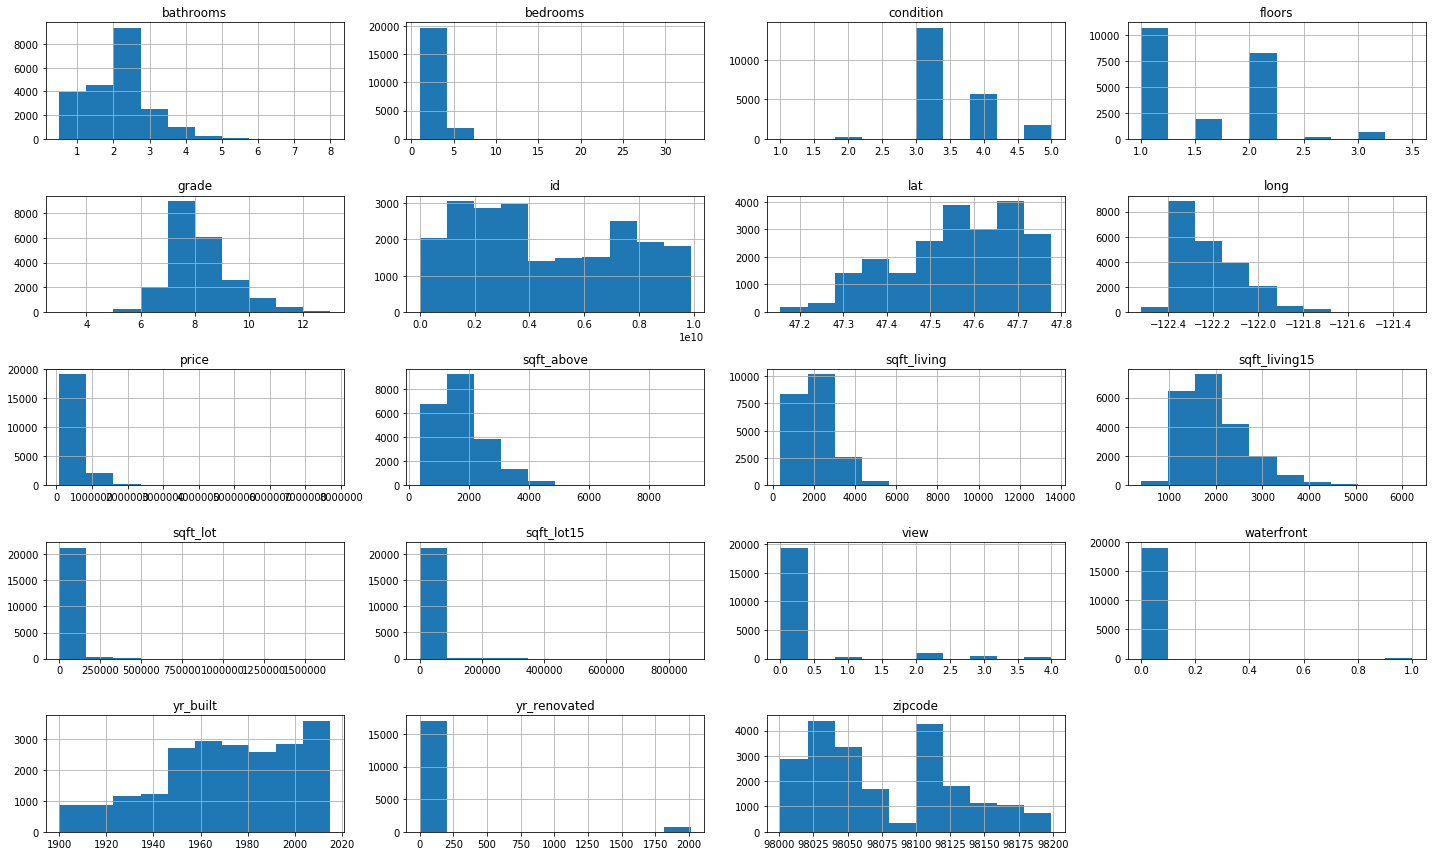

In [13]:
#Viewing the original distributions for each feature in the dataframe
o_df.hist(figsize = (20,12))
plt.tight_layout()
plt.show()

In [14]:
#Creating dataframe for features I believe may be correlated with price
df = o_df[['price','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'zipcode']]

In [15]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,zipcode
0,221900.0,3,1.00,1180,5650,1.0,7,98178
1,538000.0,3,2.25,2570,7242,2.0,7,98125
2,180000.0,2,1.00,770,10000,1.0,6,98028
3,604000.0,4,3.00,1960,5000,1.0,7,98136
4,510000.0,3,2.00,1680,8080,1.0,8,98074


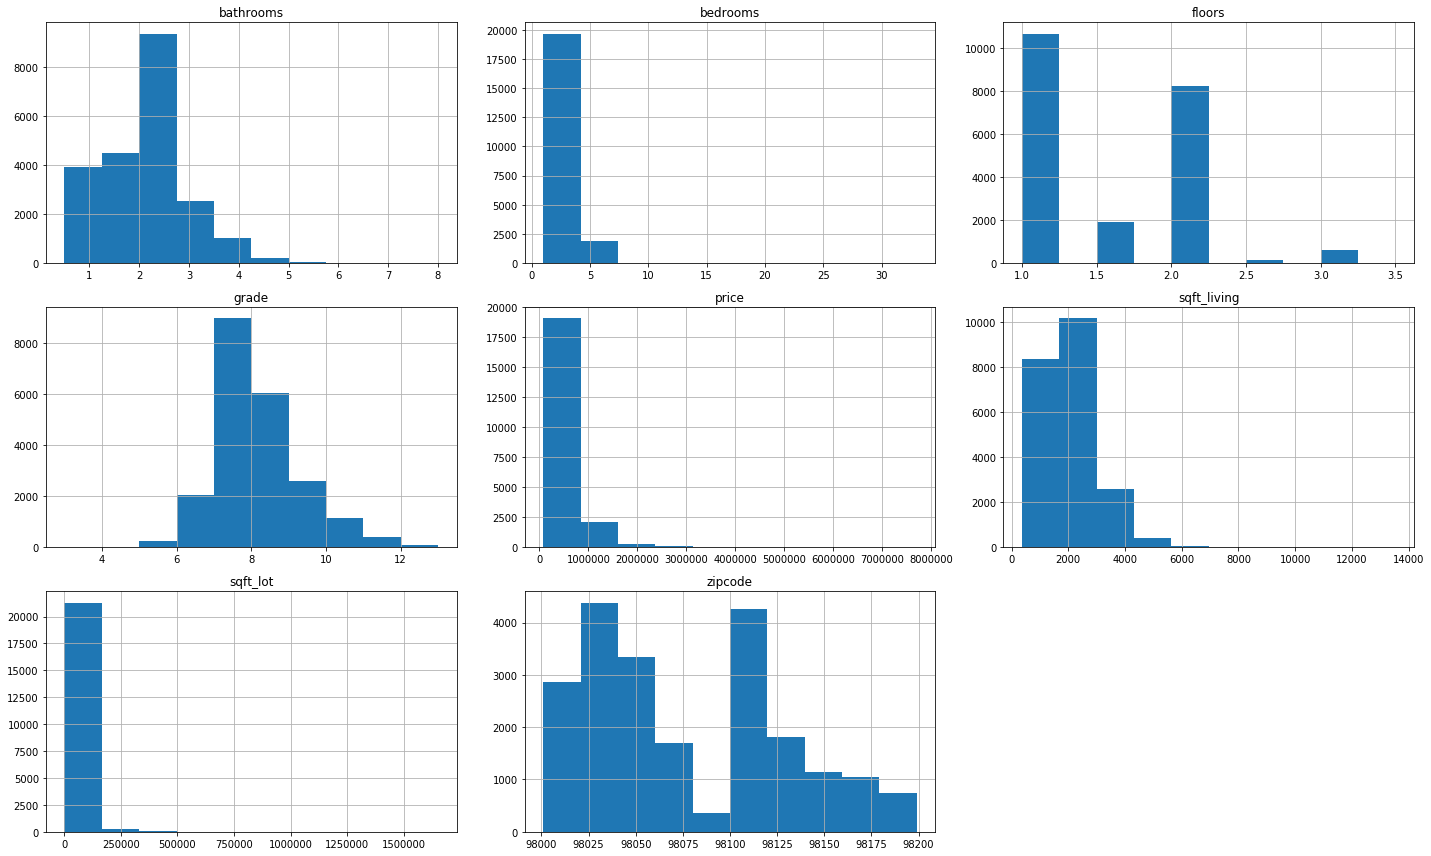

In [109]:
#Viewing the distributions for each feature in the testing dataset
df.hist(figsize = (20,12))
plt.tight_layout()
plt.show()

In [17]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,zipcode
0,221900.0,3,1.00,1180,5650,1.0,7,98178
1,538000.0,3,2.25,2570,7242,2.0,7,98125
2,180000.0,2,1.00,770,10000,1.0,6,98028
3,604000.0,4,3.00,1960,5000,1.0,7,98136
4,510000.0,3,2.00,1680,8080,1.0,8,98074


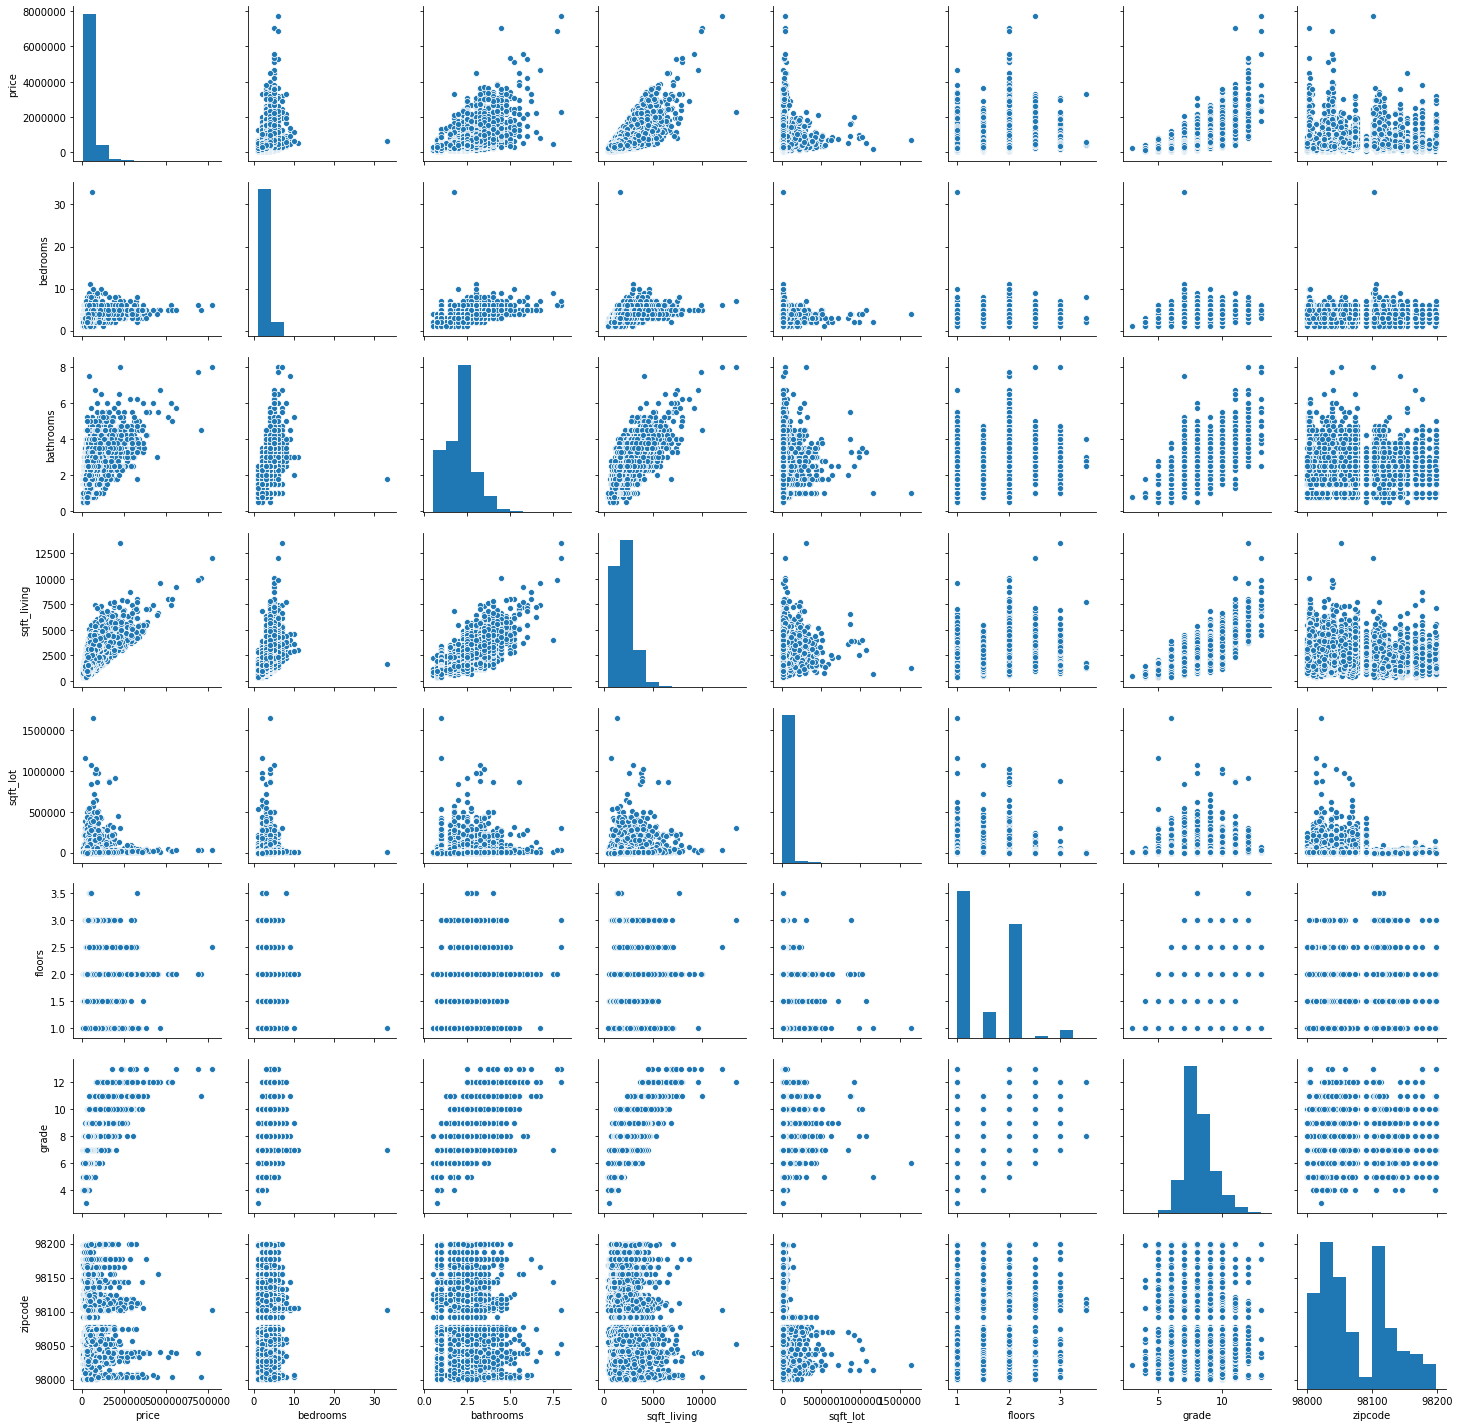

In [18]:
#Viewing each feature paired against each other to view correlations and see trends
sns.pairplot(df)

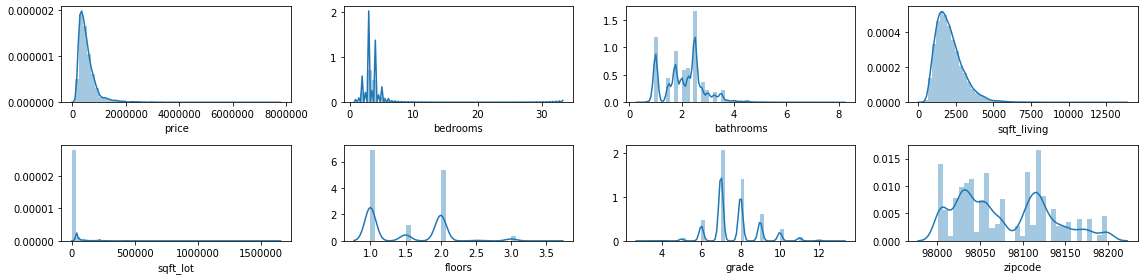

In [111]:
#Viewing the univariate distribution for each feature in the testing dataframe

#Creating variables for the number of rows and columns
rows = 2
cols = 4

#Creating subplot
fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize = (16,4))

#Iterating through each row and column of the testing dataframe
col = df.columns
index = 0
for i in range(rows):
    for j in range(cols):
        sns.distplot(df[col[index]], ax = ax[i][j])
        index += 1

plt.tight_layout()

In [20]:
#Creating and viewing the correlation map 
corrmat = df.corr
corrmat()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,zipcode
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.667951,-0.053402
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.356563,-0.154092
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.665838,-0.204786
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.762779,-0.199802
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.114731,-0.129586
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.458794,-0.059541
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,1.000000,-0.185771
zipcode,-0.053402,-0.154092,-0.204786,-0.199802,-0.129586,-0.059541,-0.185771,1.000000


In [21]:
type(corrmat())

pandas.core.frame.DataFrame

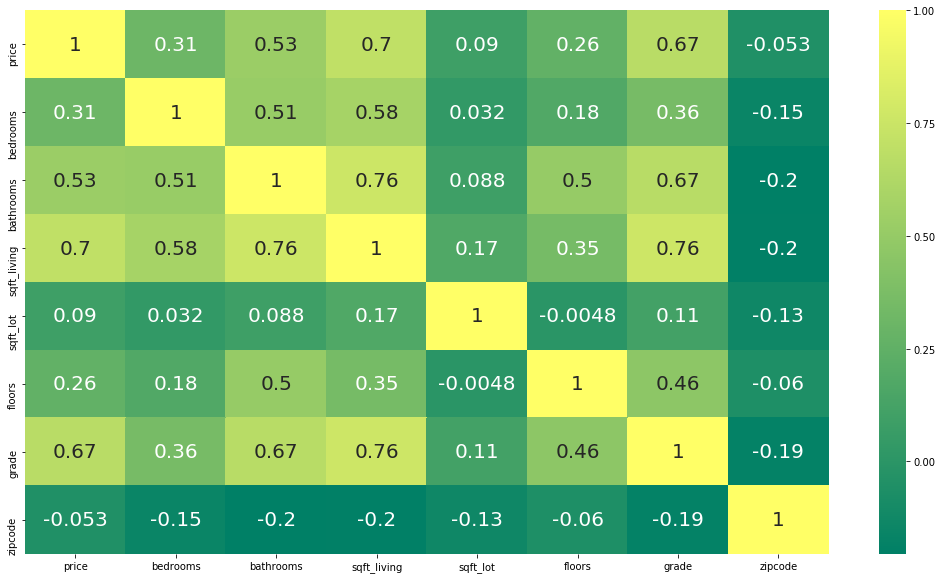

In [22]:
#Creating subplot
plt.subplots(figsize = (18,10))
#Heatmap showing the correlation between features in the testing dataframe
sns.heatmap(corrmat(), annot = True, annot_kws ={'size':20}, cmap='summer')

In [23]:
corrmat().index.values

array(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'grade', 'zipcode'], dtype=object)

In [113]:
#fuction to retrive the correlated data at a certain threshold
def getCorrelationFeatures(corrdata, threshold):
    feature = []
    value = []
    
# If the absolute value of the correlated feature is above 
# the given threshold, the value and the feature will be appended 
# to a new list
    
    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index]) > threshold:
            feature.append(index)
            value.append(corrdata[index])
    df = pd.DataFrame(data = value, index = feature, columns = ['Corr Value'])
    return df

In [25]:
#Setting the threshold
threshold = 0.5

#The correlated features for price greater than 50%
corr_value = getCorrelationFeatures(corrmat()['price'], threshold)
corr_value

,Corr Value
price,1.000000
bathrooms,0.525906
sqft_living,0.701917
grade,0.667951


In [26]:
corr_value.index

Index(['price', 'bathrooms', 'sqft_living', 'grade'], dtype='object')

In [115]:
#Creating a dataframe from the indices of the corr value
correlated_data = df[corr_value.index]
correlated_data.head()

,price,bathrooms,sqft_living,grade
0,221900.0,1.00,1180,7
1,538000.0,2.25,2570,7
2,180000.0,1.00,770,6
3,604000.0,3.00,1960,7
4,510000.0,2.00,1680,8


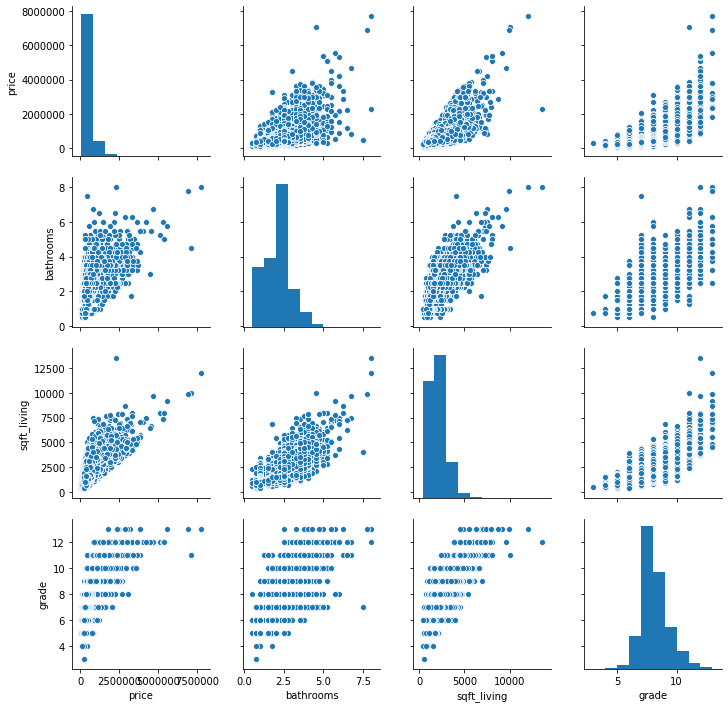

In [28]:
#Viewing each feature in the correlated data paired against 
#each other to view correlations and see trends
sns.pairplot(correlated_data)

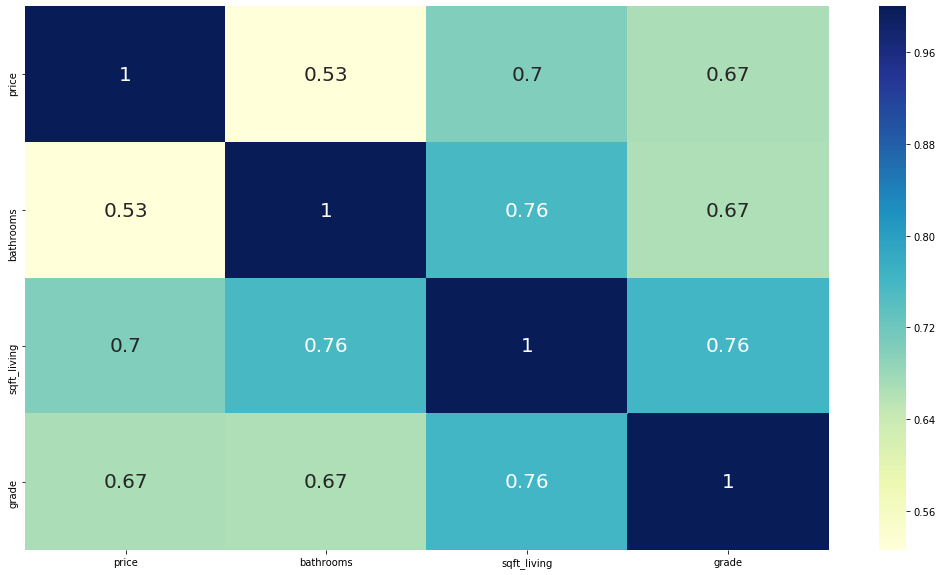

In [116]:
#Creating Subplots
plt.subplots(figsize = (18,10))
#Heatmap showing the correlation between correlated features in the testing dataframe
sns.heatmap(correlated_data.corr(), annot = True, annot_kws = {'size':20}, cmap="YlGnBu")

In [30]:
#X is a list of all of the features (also known as independent variables or inputs) excluding price
X = correlated_data.drop(labels = ['price'], axis = 1)
#y is the outcome, price
y = correlated_data['price']
X.head()

,bathrooms,sqft_living,grade
0,1.00,1180,7
1,2.25,2570,7
2,1.00,770,6
3,3.00,1960,7
4,2.00,1680,8


In [31]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [32]:
X.shape

(21597, 3)

In [33]:
#Creating a train and test split, where the test size is 20% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [34]:
X_train.shape, X_test.shape

((17277, 3), (4320, 3))

In [35]:
#Choosing a linear regression model to feed the data to
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
#Setting the test predicition for the linear model
y_predict = model.predict(X_test)

In [37]:
#Creating a dataframe for the predicted values and actual values from the regression
y1_df = pd.DataFrame(data = [y_predict, y_test])

In [38]:
#0 predicted values
#1 actual values
y1_df.T.head()

,0,1
0,1.019291e+06,650000.0
1,5.690308e+05,625000.0
2,9.803980e+05,822500.0
3,2.055172e+05,179900.0
4,8.793408e+05,370000.0


In [39]:
correlated_data.columns

Index(['price', 'bathrooms', 'sqft_living', 'grade'], dtype='object')

In [40]:
#Instantiating variables for the R2 score, mean absolute error and mean squared error
score = r2_score(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)

print('r2_score: ', score)
print('mae: ', mae)
print('mse: ', mse)

r2_score:  0.5236356475434574
mae:  161180.4223665728
mse:  56076411416.08098


In [41]:
#Creating empty lists for the performance metric function
total_features = []
total_features_name = []
selected_correlation_value = []
r2_scores = []
mae_value = []
mse_value = []

In [42]:
#Defining function for correlated features and reyurn a dataframe
def performance_Metric(features, threshold, y_true, y_pred):
    score = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    
    total_features.append(len(features)-1)
    total_features_name.append(str(features))
    selected_correlation_value.append(threshold)
    r2_scores.append(score)
    mae_value.append(mae)
    mse_value.append(mse)
    
    metric_dataframe = pd.DataFrame(data = [total_features_name, total_features,
                                             selected_correlation_value,
                                             r2_scores, mae_value, mse_value], 
                                             index = ['Features', '# of Features', 'Corr Value',
                                             'R2 Score', 'MAE', 'MSE'])
    return metric_dataframe.T

In [43]:
performance_Metric(correlated_data, threshold, y_test, y_predict)

,Features,# of Features,Corr Value,R2 Score,MAE,MSE
0,price bathrooms sqft_living grad...,21596,0.5,0.523636,161180,5.60764e+10


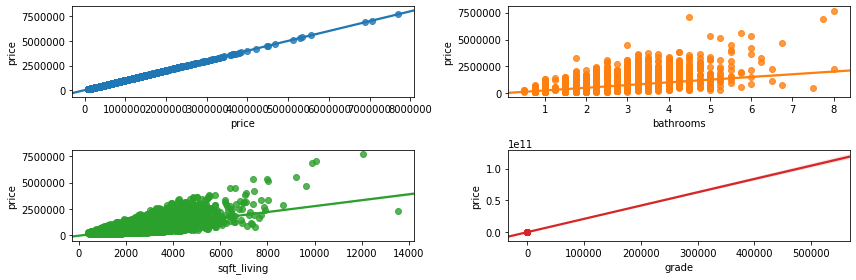

In [44]:
#Viewing the linear relationship between correlated features against price
rows = 2
cols = 2

#Creating a subplot to graph relationships
fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize = (12,4))
col = correlated_data.columns
index = 0

#generating a graph for each row and column
for i in range(rows):
    for j in range(cols):
        sns.regplot(x = correlated_data[col[index]], y = correlated_data['price'], ax = ax[i][j])
        index += 1

plt.tight_layout()

## Feature Exploration - Condition, Basement, Viewed, Waterfront 

In [45]:
o_df['condition'].head()

0    3
1    3
2    3
3    5
4    3
Name: condition, dtype: int64

In [46]:
#Viewing the number of unique items in the condition feature
o_df['condition'].nunique()

5

In [47]:
#Viewing the unique values in the condition feature
o_df['condition'].unique()

array([3, 5, 4, 1, 2])

In [48]:
#Viewing the count of each value in the condition feature
o_df['condition'].value_counts(sort = False)

1       29
2      170
3    14020
4     5677
5     1701
Name: condition, dtype: int64

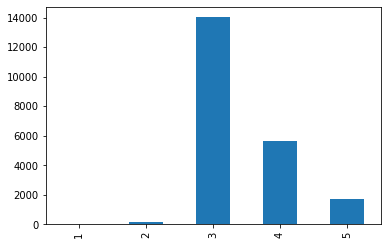

In [49]:
#creating a bar chart to view the distibution of conditon
o_df['condition'].value_counts(sort = False).plot.bar()

### Exploring Basement

In [50]:
#Setting the sqft_basement feature equal to the total living space - the space above 
#If the house has a basement, it will return the space in sq ft.  It not, it will be 0
o_df['sqft_basement'] = o_df['sqft_living'] - o_df['sqft_above']

In [51]:
o_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [52]:
o_df['sqft_basement'].head()

0      0
1    400
2      0
3    910
4      0
Name: sqft_basement, dtype: int64

In [53]:
#Viewing the min and max values o_df['sqft_basement'].min(), o_df['sqft_basement'].max()

(0, 4820)

In [54]:
o_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [55]:
#Creating a new feature to make the basement binary. 0 if there's no basement and 1 otherwise
o_df['basement'] = [0 if x <= 0  else 1 for x in o_df['sqft_basement']]

In [56]:
#Viewing the count of each value in the new basement feature 
df['basement'].value_counts(ascending = False)

0    13110
1     8487
Name: basement, dtype: int64

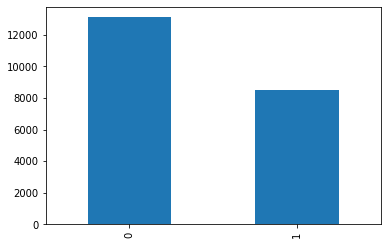

In [57]:
#Creating a bar chart to see the new distribution of the basement feature
o_df['basement'].value_counts().plot.bar()

## Exploring Viewed

In [58]:
o_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000,1
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503,0


In [59]:
#Viewing the number of unique items in the view feature
o_df['view'].nunique()

5

In [60]:
#Viewing the unique values in the view feature
o_df['view'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [61]:
#Viewing the count for each value in the view feature
o_df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

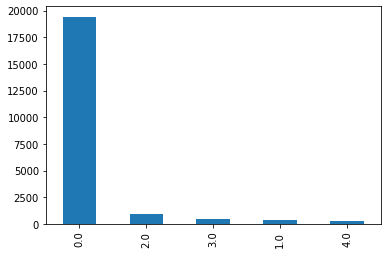

In [62]:
#Viewing the distribution for each unique value in the view feature
o_df['view'].value_counts().plot.bar()

In [63]:
#Creating a new feature called viewed making it binary
#0 for not viewed and 1 for viewed
o_df['viewed'] = [0 if x == 0 else 1 for x in o_df['view']]

In [64]:
o_df['viewed'].value_counts().sort_values()

1     2175
0    19422
Name: viewed, dtype: int64

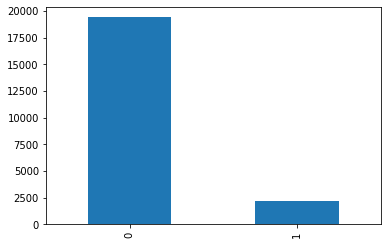

In [65]:
#Viewing the distribution for the viewed column
o_df['viewed'].value_counts().plot.bar()

In [66]:
o_df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement,viewed
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0,1933,NaN,98028,47.7379,-122.233,2720,8062,0,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910,1965,0.0,98136,47.5208,-122.393,1360,5000,1,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,0


## Exploring Waterfront

In [67]:
o_df['waterfront'].head()

0    NaN
1    0.0
2    0.0
3    0.0
4    0.0
Name: waterfront, dtype: float64

In [68]:
#Null values are being filled with 0s
o_df['waterfront'].fillna(0).head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: waterfront, dtype: float64

In [69]:
o_df['waterfront'].nunique()

2

In [120]:
o_df['waterfront'].unique()

array([1, 0])

In [71]:
o_df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [72]:
#Making waterfront binary.  0 for no waterfront and 1 for anything else
o_df['waterfront'] = [0 if x == 0 else 1 for x in o_df['waterfront']]

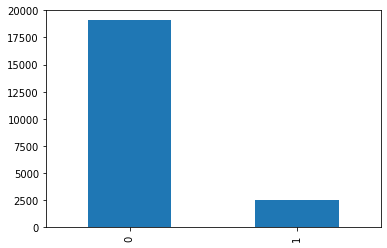

In [73]:
#Viewing the distribution of the waterfront feature
o_df['waterfront'].value_counts().plot.bar()

## Exploring Zip Code

In [74]:
o_df['zipcode'].head()

0    98178
1    98125
2    98028
3    98136
4    98074
Name: zipcode, dtype: int64

In [75]:
#Viewing the number of unique zipcodes
o_df['zipcode'].nunique()

70

In [76]:
#Viewing each unique zipcode
o_df['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

In [77]:
#Viewing the descriptive statistics for the datafame with the modified and added features 
o_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement,viewed
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21534.000000,21597.000000,...,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.116775,0.233863,3.409825,...,291.725008,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,0.392971,0.100708
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.321160,0.765686,0.650546,...,442.667800,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950,0.488422,0.300949
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,0.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,0.000000,0.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,0.000000,0.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,...,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,1.000000,0.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000,1.000000


In [78]:
#Creating the new dataframe with new and explored features
new_df = o_df[['price','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'zipcode', 'basement', 'viewed','condition', 'waterfront']]

## Testing Features using Dummy Variables

In [79]:
#create a list of features to dummy
todummy_list = ['basement', 'waterfront', 'viewed', 'condition', 'zipcode']

In [80]:
# Function to create dummies for the categorical variables used for modeling
def dummy_df(df, todummy_list):
    #for every feature in the todummy list, add dummies and drop the original feature
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis=1)
    return df

In [81]:
#Setting X to be the new and updated feature list with added dummies
X = dummy_df(new_df, todummy_list)
#Setting y to be the outcome variable, price
y = new_df['price']

In [82]:
#Dropping the price column as it is the outcome variable
X = X.drop(labels = ['price'], axis = 1)

In [83]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,basement_0,basement_1,waterfront_0,waterfront_1,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,3,1.00,1180,5650,1.0,7,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,3,2.25,2570,7242,2.0,7,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1.00,770,10000,1.0,6,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,3.00,1960,5000,1.0,7,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,3,2.00,1680,8080,1.0,8,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
X.shape

(21597, 87)

## Linear Regression

In [85]:
#Splitting up the data for training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [86]:
#Viewing the size and shape of the training and testing features
X_train.shape, X_test.shape

((17277, 87), (4320, 87))

In [87]:
#Fitting the linear regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
#Setting up the predicition for the test value
y_predict = model.predict(X_test)

In [89]:
#Creating a dataframe with both the predicted and actual y values
y_df = pd.DataFrame(data = [y_predict, y_test])

In [104]:
#0 predicted values
#1 actual values
y_df.T.head()

,0,1
0,801730.848969,650000.0
1,735928.766632,625000.0
2,917058.211517,822500.0
3,120251.433838,179900.0
4,626035.703186,370000.0


In [91]:
X.corr().head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,basement_0,basement_1,waterfront_0,waterfront_1,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
bedrooms,1.000000,0.514508,0.578212,0.032471,0.177944,0.356563,-0.162186,0.162186,0.004858,-0.004858,...,-0.031151,-0.012931,-0.007890,0.000560,-0.045699,0.002700,-0.008118,0.005210,-0.023639,-0.021325
bathrooms,0.514508,1.000000,0.755758,0.088373,0.502582,0.665838,-0.162766,0.162766,-0.011744,0.011744,...,-0.072893,-0.021539,-0.056804,-0.028999,-0.099712,-0.002250,-0.055332,-0.026073,-0.048801,0.008278
sqft_living,0.578212,0.755758,1.000000,0.173453,0.353953,0.762779,-0.204324,0.204324,-0.020362,0.020362,...,-0.058106,-0.026323,-0.046455,-0.001475,-0.074826,0.028933,-0.042364,-0.024066,-0.041815,0.010832
sqft_lot,0.032471,0.088373,0.173453,1.000000,-0.004814,0.114731,0.035227,-0.035227,-0.007191,0.007191,...,-0.017066,-0.007625,-0.016883,-0.003925,-0.010386,-0.008433,-0.018171,-0.009560,-0.012657,-0.028480
floors,0.177944,0.502582,0.353953,-0.004814,1.000000,0.458794,0.256545,-0.256545,-0.000505,0.000505,...,-0.058567,-0.027030,-0.074127,-0.049343,-0.069556,-0.044079,-0.063447,-0.039260,-0.057147,-0.005799


In [101]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,basement_0,basement_1,waterfront_0,waterfront_1,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,3,1.00,1180,5650,1.0,7,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,3,2.25,2570,7242,2.0,7,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1.00,770,10000,1.0,6,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,3.00,1960,5000,1.0,7,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,3,2.00,1680,8080,1.0,8,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
threshold = 0.5

In [93]:
#Testing the performance of the new dataframe with engineered features
performance_Metric(X.corr(), threshold, y_test, y_predict)

,Features,# of Features,Corr Value,R2 Score,MAE,MSE
0,price bathrooms sqft_living grad...,21596,0.5,0.523636,161180,5.60764e+10
1,bedrooms bathrooms sqft_livin...,86,0.5,0.778469,101801,2.60781e+10


## Ridge Regression

In [94]:
#Setting up the Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=3.8, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scalar',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 Ridge(alpha=3.8, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [95]:
# Predicting R2 Score the train set results
y_pred_ridge_train = ridge_pipe.predict(X_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Predicting R2 Score the Test set results
y_pred_ridge_test = ridge_pipe.predict(X_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Predicting RMSE 
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))

print('R2_score (train): ', r2_score_ridge_train)
print('R2_score (test): ', r2_score_ridge_test)
print("RMSE: ", rmse_ridge)

R2_score (train):  0.8893974924223063
R2_score (test):  0.8579269275340908
RMSE:  129323.17716081213


## Lasso Regression

In [97]:
#Setting up the Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.012, fit_intercept=True, max_iter=1000))
]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 132943678716910.08, tolerance: 240579307095.49396
  positive)


Pipeline(memory=None,
         steps=[('scalar',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 Lasso(alpha=0.012, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [98]:
# Predicting R2 Score the Train set results
y_pred_lasso_train = lasso_pipe.predict(X_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

# Predicting R2 Score the Test set results
y_pred_lasso_test = lasso_pipe.predict(X_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

# Predicting RMSE
rmse_lasso = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print("RMSE: ", rmse_lasso)

The history saving thread hit an unexpected error (OperationalError('unable to open database file')).History will not be written to the database.
R2_score (train):  0.8894391615782773
R2_score (test):  -0.2368082125905886
RMSE:  381567.7485904749


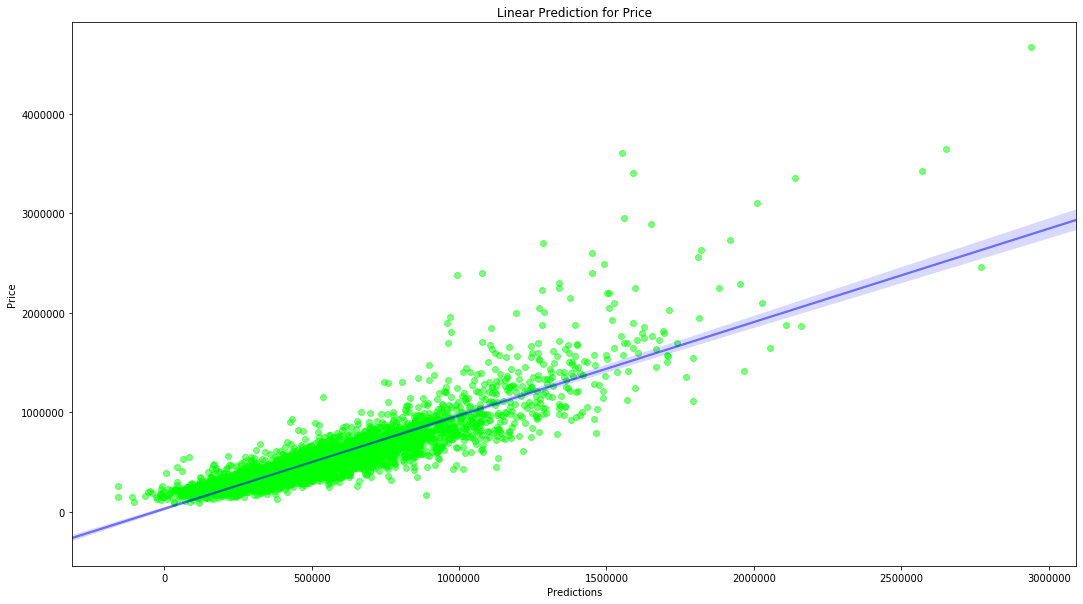

In [99]:
#Visualising the linear predicition for price
plt.figure(figsize=(18,10))
sns.regplot(y_predict,y_test,scatter_kws={'alpha':0.5,'color':'lime'},line_kws={'color':'blue','alpha':0.5})
plt.xlabel('Predictions')
plt.ylabel('Price')
plt.title("Linear Prediction for Price")
plt.show()